# Mid-Term 1


In [2]:
#HUSSEIN MAATOUK

In [ ]:
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def load_dataset(name):
    X, y = [], []
    with open("{}".format(name), 'r') as f:
        for line in f.readlines():
            splitted = line.split(",")
            X.append(splitted[:-1])
            y.append(splitted[-1])
    X, y = np.asarray(X, dtype=np.float32), np.asarray(y, dtype=np.float32)
    return X, y

### Prelude

Load the following 7 datasets:

- dataset 1: (X1, y1) with $X1 \in \mathbb{R}^{ 50 \times 10}$ and noise variance $\sigma = 0.1$
- dataset 2: (X2, y2) with $X2 \in \mathbb{R}^{ 500 \times 10}$ and noise variance $\sigma = 0.1$
- dataset 3: (X3, y3) with $X3 \in \mathbb{R}^{ 1000 \times 10}$ and noise variance $\sigma = 0.1$
- dataset 4: (X4, y4) with $X4 \in \mathbb{R}^{ 500 \times 500}$ and noise variance $\sigma = 0.1$
- dataset 5: (X5, y5) with $X5 \in \mathbb{R}^{ 500 \times 5000}$ and noise variance $\sigma = 0.1$
- dataset 6: (X6, y6) with $X6 \in \mathbb{R}^{ 500 \times 10000}$ and noise variance $\sigma = 0.1$
- dataset 7: (X7, y7) with $X7 \in \mathbb{R}^{ 500 \times 1}$ and noise variance $\sigma = 0.3$

i.e. datasets from 1 to 3 have fixed input space dimension $d = 10$ and different number of points, while datasets from 4 to 6 have fixed number of points and different number of dimensions.

In [ ]:
# Load dataset 1
(Xtr_1, ytr_1), (Xte_1, yte_1) = load_dataset("./datasets/dataset_1_train"), load_dataset("./datasets/dataset_1_test")

#Load dataset 2
(Xtr_2, ytr_2), (Xte_2, yte_2) = load_dataset("./datasets/dataset_2_train"), load_dataset("./datasets/dataset_2_test")

#Load dataset 3
(Xtr_3, ytr_3), (Xte_3, yte_3) = load_dataset("./datasets/dataset_3_train"), load_dataset("./datasets/dataset_3_test")

#Load dataset 4
(Xtr_4, ytr_4), (Xte_4, yte_4) = load_dataset("./datasets/dataset_4_train"), load_dataset("./datasets/dataset_4_test")

#Load dataset 5
(Xtr_5, ytr_5), (Xte_5, yte_5) = load_dataset("./datasets/dataset_5_train"), load_dataset("./datasets/dataset_5_test")

#Load datset 6
(Xtr_6, ytr_6), (Xte_6, yte_6) = load_dataset("./datasets/dataset_6_train"), load_dataset("./datasets/dataset_6_test")

#Load datset 7
Xtr_7, ytr_7 = load_dataset("./datasets/dataset_7_train")

# SUGGESTION!!! Check the size of each dataset

#Example
print(np.shape(Xtr_1))
print(yte_1)


(40, 10)
[-0.260284   -1.0373892  -0.8246651  -0.49714655 -0.24933848  0.58366376
  1.7878622   0.75416535 -1.057798    0.39238474]


Tips and tricks:
- to estimate the computational time of a certain portion of code use the following
    
    `
    t0 = time.time()
    ... my code ...
    mycode_time = time.time()-t0`

In [ ]:
# Example

t0 = time.time()
_ = load_dataset("./datasets/dataset_3_train")
DeltaT = time.time() - t0

print("[--] Dataset 3 loaded in {} seconds".format(DeltaT))

[--] Dataset 3 loaded in 0.014998674392700195 seconds


In [ ]:
def euclidDistance(P1,P2):
    return np.linalg.norm(P1-P2,2)

def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for idx1 in range(len(X1)):
        for idx2 in range(len(X2)):
            D[idx1,idx2] = euclidDistance(X1[idx1,:],X2[idx2,:])
    return D

def kNNClassify(Xtr, Ytr, k, Xte):

    n_train = Xtr.shape[0] # number of the training inputs
    n_test = Xte.shape[0] # number of the test inputs


    if k > n_train:
        print("k is greater than the number of points, setting k=n_train")
        k = n_train

    Ypred = np.zeros(n_test)

    # Compute all the distances from TEST input and TRAINING input
    dist = allDistances(Xtr, Xte)
    
    # For each test point, the predicted class will be 
    # the sign of the average label of the k nearest points
    for idx in range(n_test):
        # Hint 1: take all the distances for the current test point
        query_dist = dist[idx]
        # Hint 2: Sort the indices of the distances
        sorted_query_dist_idx = np.argsort(query_dist)
        # Hint 3: Get the indices of the k lowest of distances
        k_lowest = sorted_query_dist_idx[:k]
        # Hint 4: Compute the mean of the output values of the corresponding training points and taking the sign of it.
        Ypred[idx] = np.mean(Ytr[k_lowest])
                  
    return Ypred

def KFoldCVkNN(Xtr, Ytr, num_folds, k_list):
   
    rnd_state = np.random.RandomState()
    # Ensures that k_list is a numpy array
    k_list = np.array(k_list)
    num_k = len(k_list)

    n_tot = Xtr.shape[0]
    n_val = n_tot // num_folds

    # We want to compute 1 error for each `k` and each fold
    tr_errors = np.zeros((num_k, num_folds))
    val_errors = np.zeros((num_k, num_folds))

    # `split_idx`: a list of arrays, each containing the validation indices for 1 fold
    rand_idx = rnd_state.choice(n_tot, size=n_tot, replace=False)
    split_idx = np.array_split(rand_idx, num_folds)
    
    for fold_idx in range(num_folds):
        # Set the indices in boolean mask for all validation samples to `True`
        val_mask = np.zeros(n_tot, dtype=bool)
        val_mask[split_idx[fold_idx]] = True
        # Split training set in training part and validation part
        # Hint: you can use boolean mask as index vector to split Xtr and Ytr
        x_train =Xtr[~val_mask,:]
        y_train = Ytr[~val_mask,]
        x_val = Xtr[val_mask,:]
        y_val = Ytr[val_mask,]
        
        for k_idx, current_k in enumerate(k_list):
            # Compute the training error of the kNN classifier for the given value of k
            Ypredtr = kNNClassify(x_train, y_train, current_k, x_train)
            tr_errors[k_idx, fold_idx] = calcError(Ypredtr ,y_train)
            # Compute the validation error of the kNN classifier for the given value of k
            Ypredval = kNNClassify(x_train, y_train, current_k, x_val)
            val_errors[k_idx, fold_idx] = calcError(Ypredval ,y_val)
            
    # Calculate error statistics along the repetitions:
    # 1) mean training error, training error standard deviation
    tr_err_mean = np.mean(tr_errors, axis=1)
    tr_err_std = np.std(tr_errors, axis=1)
    # 2) mean validation error, validation error standard deviation
    val_err_mean = np.mean(val_errors, axis=1)
    val_err_std = np.std(val_errors, axis=1)
    # 3) best k (k which minimize mean validation error) and index of best k in k_list
    best_k = k_list[np.argmin(val_err_mean)]
    best_k_idx = np.argmin(val_err_mean)
    
    return best_k, best_k_idx, tr_err_mean, tr_err_std, val_err_mean, val_err_std

In [ ]:
def regularizedLSTrainHighDimention(Xtr, Ytr, lam):
    # Insert your code here
    A = Xtr @ Xtr.T + lam * Xtr.shape[0] * np.eye(Xtr.shape[0])
    
    return Xtr.T @ np.linalg.inv(A) @ Ytr

def regularizedLSTrainLowDimention(Xtr, Ytr, lam):
    # Insert your code here
    A = np.dot(Xtr.T, Xtr) + lam * np.dot(Xtr.shape[0], np.identity(Xtr.shape[1]))
    b = np.dot(Xtr.T, Ytr)
    L = np.linalg.cholesky(A)
    y = scipy.linalg.solve_triangular(L,b, trans=0, lower= True)
    w = scipy.linalg.solve_triangular(L.T,y, trans=0, lower= True)
    
    return w

def regularizedLSTrain(Xtr, Ytr, lam):
    # Insert your code here
    if Xtr.shape[0] > Xtr.shape[1]:
        return regularizedLSTrainLowDimention(Xtr, Ytr, lam)
    else:
        return regularizedLSTrainHighDimention(Xtr, Ytr, lam)

def regularizedLSTest(Xte, w):
    # Insert your code here
    return np.dot(Xte, w)

def KFoldCVRLS(Xtr, Ytr, KF, regpar_list):
    if KF <= 1:
        raise Exception("Please supply a number of fold > 1")

    # Ensures that regpar_list is a numpy array
    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]
    n_val = int(n_tot // KF)

    # We want to compute 1 error for each `k` and each fold
    tr_errors = np.zeros((num_regpar, KF))
    val_errors = np.zeros((num_regpar, KF))

    for idx, regpar in enumerate(regpar_list):
        # `split_idx`: a list of arrays, each containing the validation indices for 1 fold
        rand_idx = np.random.choice(n_tot, size=n_tot, replace=False)
        split_idx = np.array_split(rand_idx, KF)
        for fold in range(KF):
            # Set the indices in boolean mask for all validation samples to `True`
            val_mask = np.zeros(n_tot, dtype=bool)
            val_mask[split_idx[fold]] = True

            # Use the boolean mask to split X, Y in training and validation part

            X =Xtr[~val_mask,:]
            Y = Ytr[~val_mask,]
            X_val = Xtr[val_mask,:]
            Y_val = Ytr[val_mask,]
            
            # Train a RLS model for a single fold, and the given value of `regpar`
            currW = regularizedLSTrain(X, Y, regpar)
            
            # Compute the training error of the RLS regression for the given value of regpar
            YpredTR = regularizedLSTest(X, currW)
            tr_errors[idx, fold] = calcError(YpredTR, Y)

            # Compute the validation error of the RLS regression for the given value of regpar
            YpredVAL = regularizedLSTest(X_val, currW)
            val_errors[idx, fold] = calcError(YpredVAL, Y_val)
            
    # Calculate error statistics along the repetitions
    tr_mean = np.mean(tr_errors, axis=1)
    tr_var = np.var(tr_errors, axis=1)
    val_mean = np.mean(val_errors, axis=1)
    val_var = np.var(val_errors, axis=1)
    
    bestlam_idx = np.argmin(val_mean)
    bestlam = regpar_list[bestlam_idx]

    return bestlam, bestlam_idx, val_mean, val_var, tr_mean, tr_var

In [ ]:
def calcError(Ypred, Ytrue):
    return (np.mean(np.square(Ypred-Ytrue)))


### Activity 1 

Compare the behavior of K-NN and RLS on the datasets according to the following tasks:
- Task 1.1: Compare training, validation, test errors and training and test time of the two methods on datasets 1, 2, 3
- Task 1.2: Compare training, validation, test errors and training and test time of the two methods on datasets 4, 5, 6 




In [ ]:
Ks = list(range(1, 100, 10))
lams = np.logspace(-9, 2, 10)
KF = 5

knn_training_err = []
rls_training_err = []

knn_validation_err = []
rls_validation_err = []

knn_test_err = []
rls_test_err = []

knn_training_time = []
rls_training_time = []

knn_test_time = []
rls_test_time = []

# TASK 1.1

# cross validation of KNN for dataset 1 #k star 


best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_1, ytr_1, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 1 #lamda star
best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_1, ytr_1, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time
print("knn 1")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_1, ytr_1, best_k, Xtr_1)
training_err = calcError(Ytrpred, ytr_1)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_1, ytr_1, best_k, Xte_1)
test_err = calcError(Ytepred, yte_1)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)

print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)


# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 1")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_1, ytr_1, best_lamda)
Ytrpred = regularizedLSTest(Xtr_1, w_true)
training_err = calcError(Ytrpred, ytr_1)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_1, w_true)
test_err = calcError(Ytepred, yte_1)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)





# cross validation of KNN for dataset 2

best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_2, ytr_2, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 2 #lamda star
best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_2, ytr_2, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time

print("knn 2")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_2, ytr_2, best_k, Xtr_2)
training_err = calcError(Ytrpred, ytr_2)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_2, ytr_2, best_k, Xte_2)
test_err = calcError(Ytepred, yte_2)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)


print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)

# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 2")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_2, ytr_2, best_lamda)
Ytrpred = regularizedLSTest(Xtr_2, w_true)
training_err = calcError(Ytrpred, ytr_2)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_2, w_true)
test_err = calcError(Ytepred, yte_2)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)


# cross validation of KNN for dataset 3



best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_3, ytr_3, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 3 

best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_3, ytr_3, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time


print("knn 3")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_3, ytr_3, best_k, Xtr_3)
training_err = calcError(Ytrpred, ytr_3)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_3, ytr_3, best_k, Xte_3)
test_err = calcError(Ytepred, yte_3)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)


print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)

# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 3")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_3, ytr_3, best_lamda)
Ytrpred = regularizedLSTest(Xtr_3, w_true)
training_err = calcError(Ytrpred, ytr_3)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_3, w_true)
test_err = calcError(Ytepred, yte_3)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)


# TASK 1.2


# cross validation of KNN for dataset 4

best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_4, ytr_4, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 4 

best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_4, ytr_4, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time


print("knn 4")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_4, ytr_4, best_k, Xtr_4)
training_err = calcError(Ytrpred, ytr_4)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_4, ytr_4, best_k, Xte_4)
test_err = calcError(Ytepred, yte_4)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)


print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)

# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 4")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_4, ytr_4, best_lamda)
Ytrpred = regularizedLSTest(Xtr_4, w_true)
training_err = calcError(Ytrpred, ytr_4)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_4, w_true)
test_err = calcError(Ytepred, yte_4)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)

# cross validation of KNN for dataset 5

best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_5, ytr_5, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 5 

best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_5, ytr_5, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time


print("knn 5")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_5, ytr_5, best_k, Xtr_5)
training_err = calcError(Ytrpred, ytr_5)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_5, ytr_5, best_k, Xte_5)
test_err = calcError(Ytepred, yte_5)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)


print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)

# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 5")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_5, ytr_5, best_lamda)
Ytrpred = regularizedLSTest(Xtr_5, w_true)
training_err = calcError(Ytrpred, ytr_5)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_5, w_true)
test_err = calcError(Ytepred, yte_5)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)

# cross validation of KNN for dataset 6

best_k, best_k_idx, training_err, _, validation_err, _ = KFoldCVkNN(Xtr_6, ytr_6, KF, Ks)
knn_validation_err.append(validation_err[best_k_idx])


# cross validation of RLS for dataset 6

best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_6, ytr_6, KF, lams)
rls_validation_err.append(validation_err[best_lamda_idx])


# train KNN with parameter obtained by KFold-Cross Validation and estimate computational time


print("knn 6")
t_start = time.time()
Ytrpred = kNNClassify(Xtr_6, ytr_6, best_k, Xtr_6)
training_err = calcError(Ytrpred, ytr_6)
knn_training_err.append(training_err)
delta_t = time.time() - t_start
knn_training_time.append(delta_t)

t_start = time.time()
Ytepred = kNNClassify(Xtr_6, ytr_6, best_k, Xte_6)
test_err = calcError(Ytepred, yte_6)
knn_test_err.append(test_err)
delta_t = time.time() - t_start
knn_test_time.append(delta_t)


print(best_k, knn_training_err, knn_validation_err, knn_test_err, knn_training_time, knn_test_time)

# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 6")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_6, ytr_6, best_lamda)
Ytrpred = regularizedLSTest(Xtr_6, w_true)
training_err = calcError(Ytrpred, ytr_6)
rls_training_err.append(training_err)
delta_time = time.time() - t_start
rls_training_time.append(delta_time)

t_start= time.time()
Ytepred = regularizedLSTest(Xte_6, w_true)
test_err = calcError(Ytepred, yte_6)
rls_test_err.append(test_err)
delta_time = time.time() - t_start
rls_test_time.append(delta_time)


print(best_lamda, rls_training_err, rls_validation_err, rls_test_err, rls_training_time, rls_test_time)


# Tips: to compare the methods, you should 
# - plot training and validation errors for the different hypeparameter values considered in the cross-validation procedure
# - print in output the training, validation and test errors corresponding to the final model


k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater than the number of points, setting k=n_train
k is greater t

['0.58671784', '0.37256413', '0.38034231', '58.24864817', '542.60134735', '983.83479075']


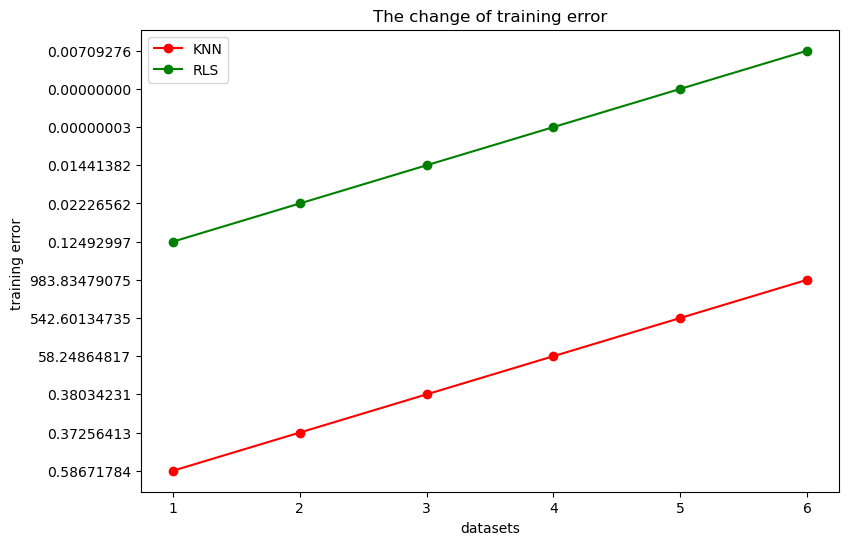

In [ ]:
x = ["1", "2","3","4","5","6"]
plt.rcParams["figure.figsize"] = [9, 6]
knn_training_err = ["{:.8f}".format(float(i)) for i in knn_training_err ]
rls_training_err = ["{:.8f}".format(float(i)) for i in rls_training_err ]

print(knn_training_err)

plt.title("The change of training error")
plt.xlabel("datasets")

plt.ylabel("training error ")
plt.plot(x, knn_training_err, color="red",marker="o" ,label="KNN")
plt.plot(x, rls_training_err, color="green",marker="o" ,label="RLS")
plt.legend()
plt.show()

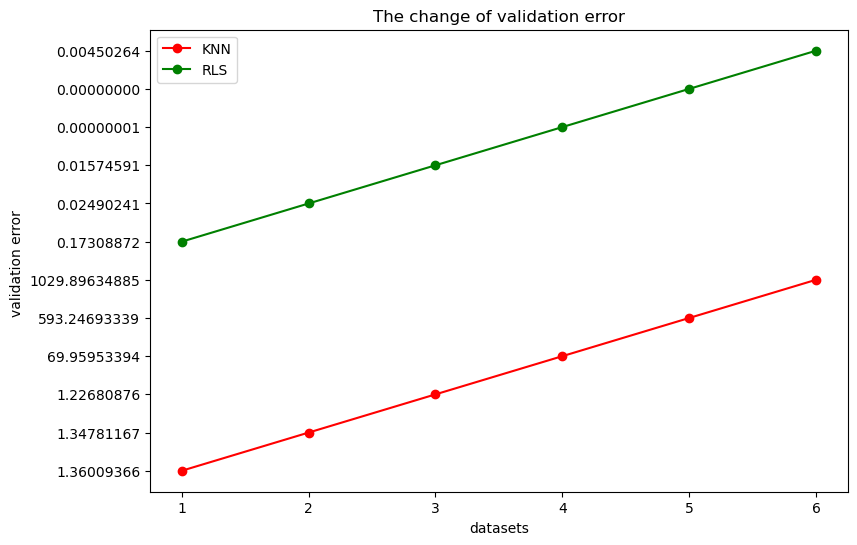

In [ ]:
x = ["1", "2", "3","4","5","6"]
plt.rcParams["figure.figsize"] = [9, 6]

knn_validation_err = ["{:.8f}".format(float(i)) for i in knn_validation_err ]
rls_validation_err = ["{:.8f}".format(float(i)) for i in rls_validation_err ]

plt.title("The change of validation error")
plt.xlabel("datasets")
plt.ylabel("validation error ")
plt.plot(x, knn_validation_err, color="red",marker="o" , label="KNN")
plt.plot(x, rls_validation_err, color="green",marker="o" , label="RLS")
plt.legend()
plt.show()

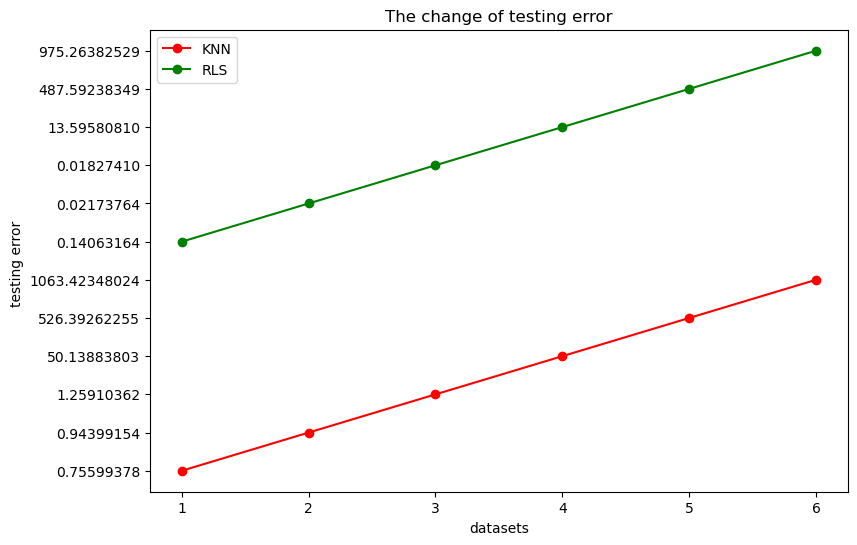

In [ ]:
x = ["1", "2", "3","4","5","6"]
plt.rcParams["figure.figsize"] = [9, 6]

knn_test_err = ["{:.8f}".format(float(i)) for i in knn_test_err ]
rls_test_err = ["{:.8f}".format(float(i)) for i in rls_test_err ]

plt.title("The change of testing error")
plt.xlabel("datasets")

plt.ylabel("testing error ")
plt.plot(x, knn_test_err, color="red",marker="o" , label="KNN")
plt.plot(x, rls_test_err, color="green",marker="o" , label="RLS")
plt.legend()
plt.show()

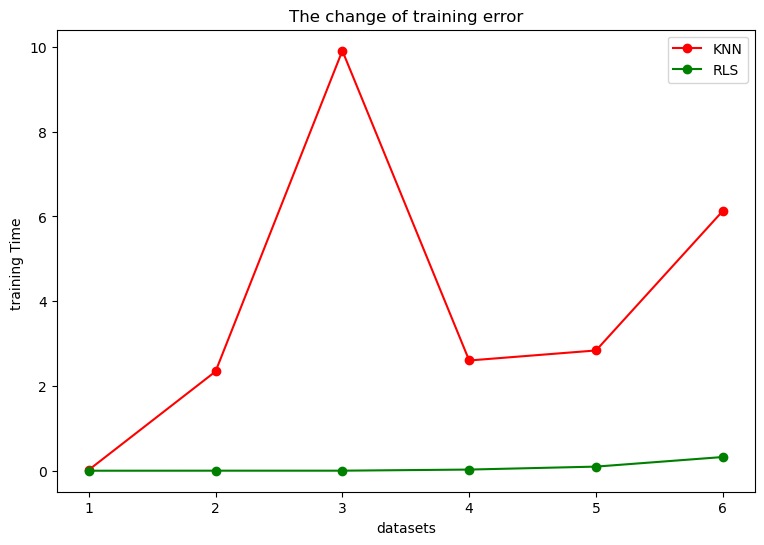

In [ ]:
x = ["1", "2", "3","4","5","6"]
plt.rcParams["figure.figsize"] = [9, 6]


plt.title("The change of training error")
plt.xlabel("datasets")

plt.ylabel("training Time ")
plt.plot(x, knn_training_time, color="red",marker="o" , label="KNN")
plt.plot(x, rls_training_time, color="green",marker="o" ,label="RLS")
plt.legend()
plt.show()

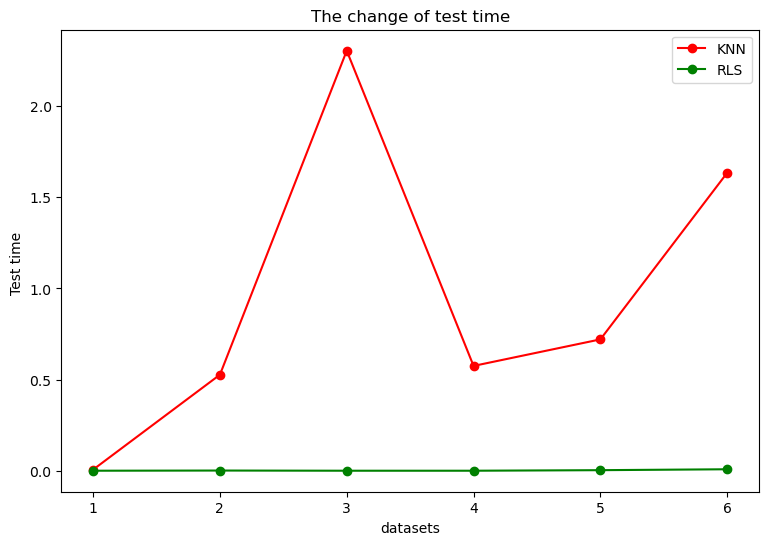

In [ ]:
x = ["1", "2", "3","4","5","6"]
plt.rcParams["figure.figsize"] = [9, 6]


plt.title("The change of test time")
plt.xlabel("datasets")

plt.ylabel("Test time ")
plt.plot(x, knn_test_time, color="red",marker="o" , label="KNN")
plt.plot(x, rls_test_time, color="green",marker="o" ,label="RLS")
plt.legend()
plt.show()

What can you observe? **Describe here your observations:**

we can observe than traing and testing and validation errors for RLS model is better than KNN algorithm, for both 
low and high dimensionality,even for computational time RLS is much cheaper, hence for the next activity we will be using RLS model that has low dimentionality.



### Acitivity 2

Find your optimal solution for the dataset 7, we will evaluate the goodness of your model on the test set

In [1]:
fig, ax = plt.subplots()
ax.plot(Xtr_7, ytr_7, 'o')
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("y", fontsize=16)

NameError: ignored

In [ ]:
# Insert your code here
lams = np.logspace(-9, 2, 10)
KF = 5
_validation_error = 0
_training_error = 0
# cross validation of RLS for dataset 7 #lamda star
best_lamda, best_lamda_idx, training_err, _, validation_err, _ = KFoldCVRLS(Xtr_7, ytr_7, KF, lams)
_validation_error = validation_err[best_lamda_idx]



# train RLS with parameter obtained by KFold-Cross Validation and estimate computational time
print("RLS 7")
t_start = time.time()
w_true = regularizedLSTrain(Xtr_7, ytr_7, best_lamda)
Ytrpred = regularizedLSTest(Xtr_7, w_true)
_training_error = calcError(Ytrpred, ytr_7)

_training_time = time.time() - t_start



print(_training_error,_validation_error,_training_time)

RLS 7
0.9909876236248815 0.9909220317720578 0.0010023117065429688
